In [1]:
#importing libraries
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#generating two features X1 and X2 with some linearity (random data)
temp_1 = np.random.normal(0, 1, size=300)
temp_2 = np.random.normal(2, 1, size=300)
temp_3 = np.random.normal(4, 1, size=300)

temp_4 = np.random.normal(0, 1, size=300)
temp_5 = np.random.normal(2, 1, size=300)
temp_6 = np.random.normal(4, 1, size=300)

X1 = np.concatenate((temp_1, temp_2, temp_3))
X2 = np.concatenate((temp_4, temp_5, temp_6))

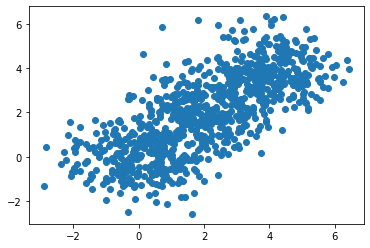

In [3]:
#visualizing data points
plt.scatter(X1, X2)

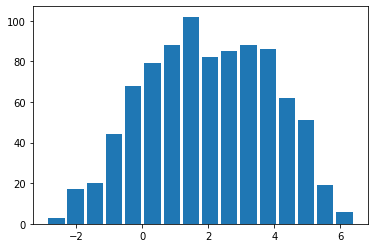

In [4]:
#visualizing histogram of X1 (which will be gaussian)
n, bins, patches = plt.hist(x=X1, bins='auto', rwidth=0.85)

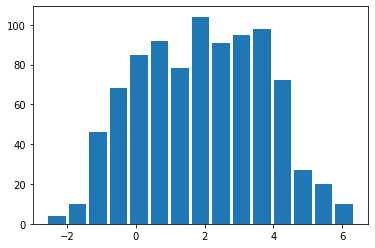

In [5]:
#visualizing histogram of X2 (which will be gaussian)
n, bins, patches = plt.hist(x=X2, bins='auto', rwidth=0.85)

In [6]:
#getting mean and standard deviation of X1 and X2
X1_mean, X1_std = X1.mean(), X1.std()
X2_mean, X2_std = X2.mean(), X2.std()

mu = np.array([X1_mean, X2_mean])
print(mu)

[1.98803104 1.9314584 ]


In [7]:
#creating one array per data point from X1 and X2 features
X = np.array(list(zip(X1,X2)))
print(X1[0], X2[0], X[0])

-0.0397169191757157 -0.8849068803196901 [-0.03971692 -0.88490688]


In [8]:
#calculating covariance matrix sigma
sigma = (1/len(X))*(np.dot((X - mu).T, (X - mu)))

In [9]:
#function to calculate p(x) from mean and covariance matrix
import math

def multivariate_anomaly_detection(X):
    P_x = P_x = np.power(2*math.pi, -2/2)*np.power(np.linalg.det(sigma), -0.5)*np.exp((-0.5)*np.linalg.multi_dot([(X-mu), np.linalg.inv(sigma), (X-mu).T]))
    return P_x

In [10]:
#list of p(x) for each data point
P_x = []

for i in range(len(X)):
    P_x.append(multivariate_anomaly_detection(X[i]))
    
print(P_x[0:5])

[0.02033668701152691, 0.0008529682567798854, 0.041828090709563406, 0.03234241605741734, 0.01949281763429319]


In [11]:
#epsilon is the threshold which we have to decide so in this case we are taking minimum of P(x)
epsilon = min(P_x)
print(epsilon)

2.8900948317787976e-05


In [12]:
#predicting on new data point (X1,X2)=(6,6) and detecting if it is anomaly or not
P_x_pred = multivariate_anomaly_detection([6,6])

if P_x_pred < epsilon:
    print("Anomaly")
else:
    print("Normal")

Normal


In [13]:
#predicting on new data point (X1,X2)=(6,0) and detecting if it is anomaly or not
P_x_pred = multivariate_anomaly_detection([6,0])

if P_x_pred < epsilon:
    print("Anomaly")
else:
    print("Normal")

Anomaly


In [14]:
#generating random test data
test_data = []
for i in range(-10, 15):
    for j in range(-10, 15):
        test_data.append([i, j])
        
print(test_data[0:5])

[[-10, -10], [-10, -9], [-10, -8], [-10, -7], [-10, -6]]


In [15]:
#generating prediction of each test point and appending in y_pred list
y_pred = []
for td in test_data:
    P_x_pred = multivariate_anomaly_detection(td)
    
    if P_x_pred < epsilon:
        y_pred.append(1)
    else:
        y_pred.append(0)
        
print(y_pred[0:5])

[1, 1, 1, 1, 1]


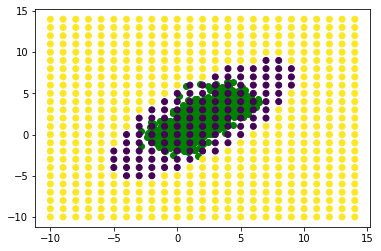

In [16]:
#visualizing anomaly
plt.scatter(X1, X2, color="green")
plt.scatter([i[0] for i in test_data], [i[1] for i in test_data], c=y_pred)

In [ ]:
#All yellow points are detected as Anomaly